# Collaborationand Competition



## 0. Setup

To run any of the parts below 1,2,3. You need to have executed this section first.
                    

Import **TheAgent class** ( requires agent_training.py , envhelper.py and models.py in same directory as this, or findable  ). Along with other dependencies as outlined in the README.MD of this repository.


In [1]:
from agent_training import AgentTrainer
import numpy as np
# for ploting results 
import matplotlib.pyplot as plt

Setup the hyper / network parameters

**Important** Set the constant AGENT_FILE to the correct unity ml_agent binary

In [2]:
class ConfigParams(object):

    AGENT_FILE = './Tennis_Linux/Tennis.x86_64'
    BUFFER_SIZE = 100000
    BATCH_SIZE = 128
    GAMMA = 0.99
    TAU = 0.01
    LR_ACTOR = 0.0002
    LR_CRITIC = 0.0002

    ACTOR_FC1_SIZE = 128
    ACTOR_FC2_SIZE = 128

    CRITIC_FC1_SIZE = 128
    CRITIC_FC2_SIZE = 128



## 1. Train The Agent

Train the agent by executing code cell below ( it may take a while ), it will use the hyperparamets given above.

On completion model weights are saved in 'model.pt' or whatever model_name you give to agent.train() .

Set viewer = True in agent.start if you want to view the environment during training.


In [ ]:
try:
    agent = AgentTrainer(ConfigParams)  # pass the agent environment
    agent.start(viewer=False,seed=12345)  # start environment without viewerx
    agent.train(10000, 'model')
finally:
    agent.end()
    

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Episode    50   13 , score =    0.000 average(100) =    0.004
Episode   100   14 , score =    0.000 average(100) =    0.004
Episode   150   14 , score =    0.000 average(100) =    0.009
Episode   200   13 , score =    0.000 average(100) =    0.013
Episode   250   13 , score =    0.000 average(100) =    0.021
Episode   300   13 , score =    0.000 average(100) =    0.021
Episode   350   89 , score =    0.200 average(100) =    0.025
Episode   400   13 , score =    0.000 average(100) =    0.034
Episode   450   12 , score =    0.000 average(100) =    0.035
Episode   500   30 , score =    0.100 average(100) =    0.056
Episode   550   88 , score =    0.200 average(100) =    0.172
Episode   600   48 , score =    0.100 average(100) =    0.213
Episode   650   30 , score =    0.090 average(100) =    0.196
Episode   700  273 , score =    0.700 average(100) =    0.298
Episode   750  203 , score =    0.500 average(100) =    0.343
Episode   800   13 , score =    0.000 average(100) =    0.315
Episode 

### Visualize Training Scores

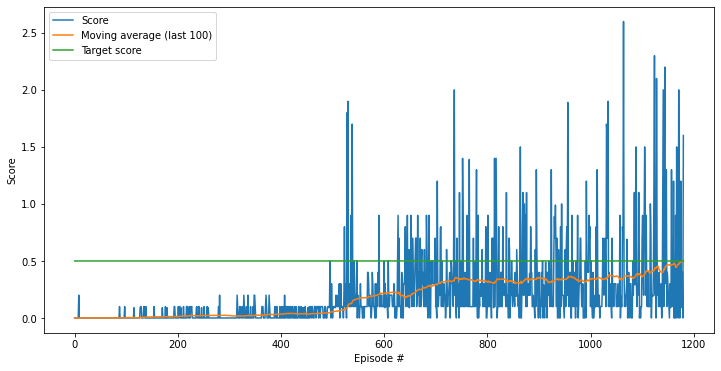

In [8]:
# compute a moving average over last 100 scores.
mavg = [ np.array( agent.scores[i-100:i]).sum() / 100 for i in range( 0 , len( agent.scores ))]
fig = plt.figure( figsize=(12,6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(agent.scores)), agent.scores)
plt.plot(np.arange(len(mavg)) , mavg )
plt.plot(np.arange(len(agent.scores)), np.ones(len(agent.scores))*0.5 )
plt.legend( ['Score','Moving average (last 100)','Target score'])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


## 2. Validation Run

Make sure the trained model, actually still can obtain an average of >= 13 , over 100 episodes.
We use another fixed seed - so we are not generating the same first 100 episodes that we trained on.

In [ ]:
try:
    agent = AgentTrainer(ConfigParams)
    agent.start(viewer=False, seed=12345)  # start environment without viewerx
    agent.play( 100 , 'model', train_mode = True)
finally:
    agent.end()


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### Visualize Validation Scores

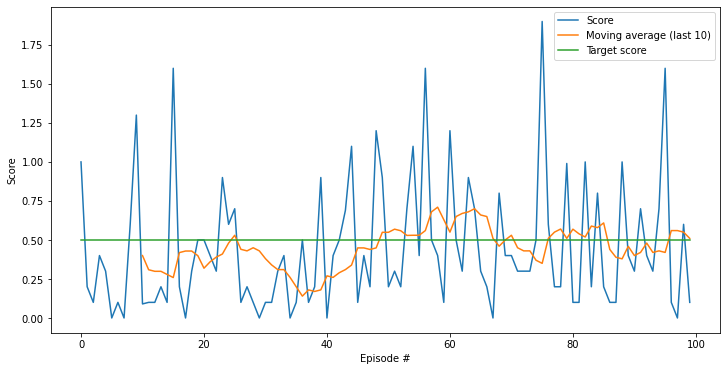

In [16]:
# PLOT 
mavg = [ np.array( agent.scores[i-10:i]).sum() / 10  for i in range( 10 , len( agent.scores))] 
fig = plt.figure( figsize=(12,6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(agent.scores)), agent.scores)
plt.plot(np.arange(len(mavg)) + 10 , mavg )
plt.plot(np.arange(len(agent.scores)), np.ones(len(agent.scores))*0.5 )
plt.legend( ['Score','Moving average (last 10)','Target score'])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [3]:
try:
    del agent
except:
    pass

## 3. Play

Set agent.start( viewer = False ) if no graphics required.

NB: We set the seed to something random ( to get a different play experience each time ), as during training we fix the randomness of the environment - so we can better see that effects of tweaking the hyper parameters.

In [ ]:
try:
    agent = AgentTrainer(ConfigParams)
    agent.start( viewer = True , seed= 54321 )    
    agent.play( 100,  'model' , train_mode = False  ) 
    print ( f'Score { np.mean(agent.model.scores)  }' )

finally:
    agent.end() 
    pass

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [ ]:
# delete the agent
try:
    del agent
except:
    pass